In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/diabetes-dataset/diabetes.csv


In [2]:
diabetes = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

In [3]:
diabetes.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
764,2,122,70,27,0,36.8,0.340,27,0
552,6,114,88,0,0,27.8,0.247,66,0
270,10,101,86,37,0,45.6,1.136,38,1
661,1,199,76,43,0,42.9,1.394,22,1
473,7,136,90,0,0,29.9,0.210,50,0


In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Preprocessing

In [6]:
diabetes.isnull().sum().sum()

0

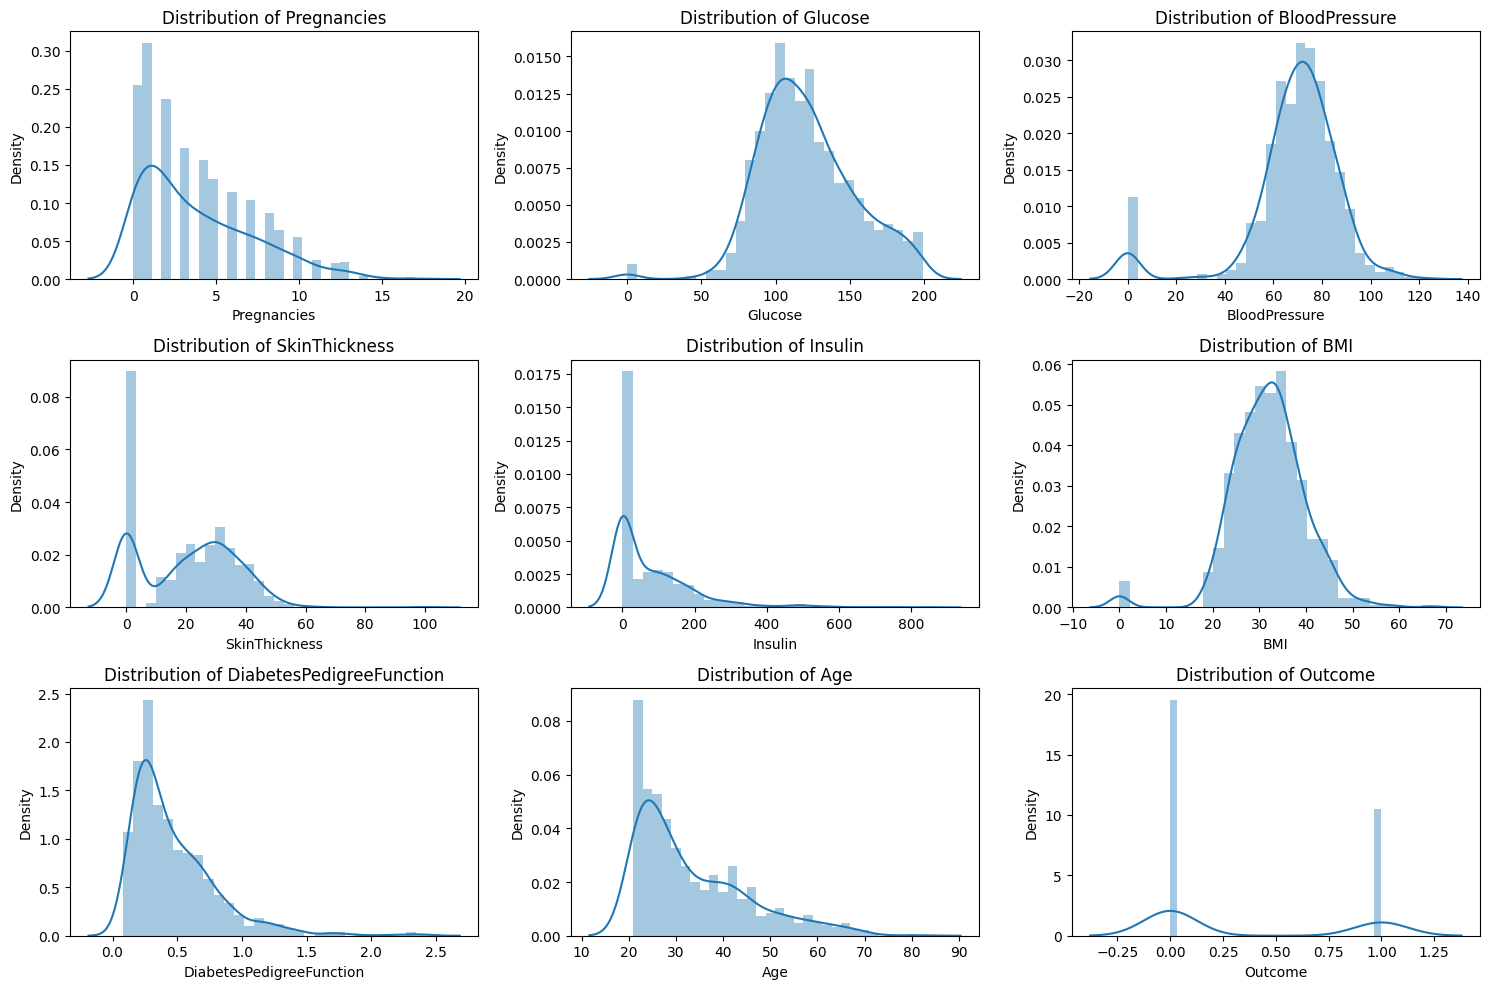

In [7]:
# Number of columns in your dataset
num_cols = len(diabetes.columns)

# Create subplots with an appropriate layout
fig, axes = plt.subplots(nrows=(num_cols // 3) + (num_cols % 3 > 0), ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot each column in the dataset
for i, col in enumerate(diabetes.columns):
    sns.distplot(diabetes[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [8]:
for i, col in enumerate(diabetes.columns):
    print(f"Skewness: {col}: ", diabetes[col].skew().round(3))

Skewness: Pregnancies:  0.902
Skewness: Glucose:  0.174
Skewness: BloodPressure:  -1.844
Skewness: SkinThickness:  0.109
Skewness: Insulin:  2.272
Skewness: BMI:  -0.429
Skewness: DiabetesPedigreeFunction:  1.92
Skewness: Age:  1.13
Skewness: Outcome:  0.635


> Typically in the range of -0.5 to 0.5, generally indicates low or no skewness,

In [9]:
scaler = StandardScaler()
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']
X_scaled = scaler.fit_transform(X)

In [10]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)
     

LogisticRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy*100}')
print(f'Precision: {precision*100}')
print(f'Recall: {recall*100}')

Accuracy: 75.32467532467533
Precision: 64.91228070175438
Recall: 67.27272727272727


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



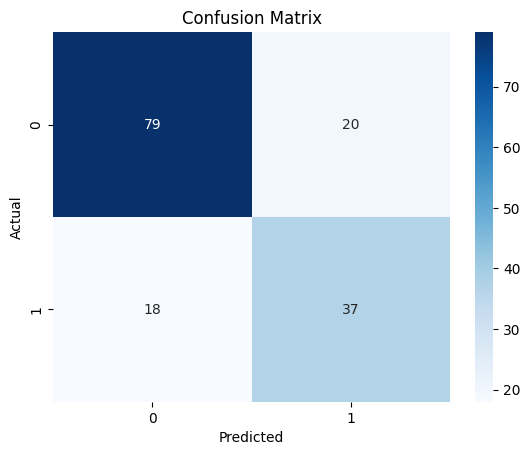

In [14]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()